<a href="https://colab.research.google.com/github/ManishaBamin/AI-AND-ML/blob/main/Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("phishing.csv")
df

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [4]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [5]:
df.columns


Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [6]:
df.shape

(11054, 32)

In [7]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [8]:
# Classification Algorithms
from sklearn.model_selection import train_test_split,cross_val_score

In [9]:
X= df.drop(columns='class')
X.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1


In [10]:
Y=df['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [12]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [13]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 31)
(3317, 31)
(7737, 1)
(3317, 1)


In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [15]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
logreg_predict= model_1.predict(test_X)

In [17]:
accuracy_score(logreg_predict,test_Y)

0.9276454627675611

In [18]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [19]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

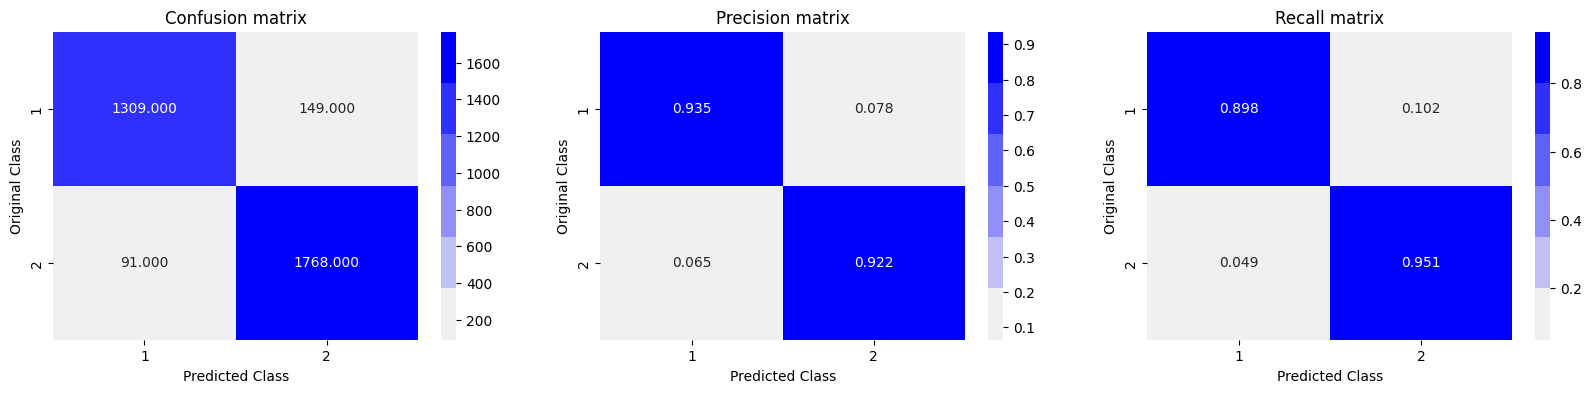

In [20]:
plot_confusion_matrix(test_Y, logreg_predict)

In [21]:
# K-Nearest Neighbours Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [23]:
knn_predict=model_2.predict(test_X)

In [24]:
accuracy_score(knn_predict,test_Y)

0.6352125414531203

In [25]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.58      0.59      0.59      1458
           1       0.68      0.67      0.67      1859

    accuracy                           0.64      3317
   macro avg       0.63      0.63      0.63      3317
weighted avg       0.64      0.64      0.64      3317



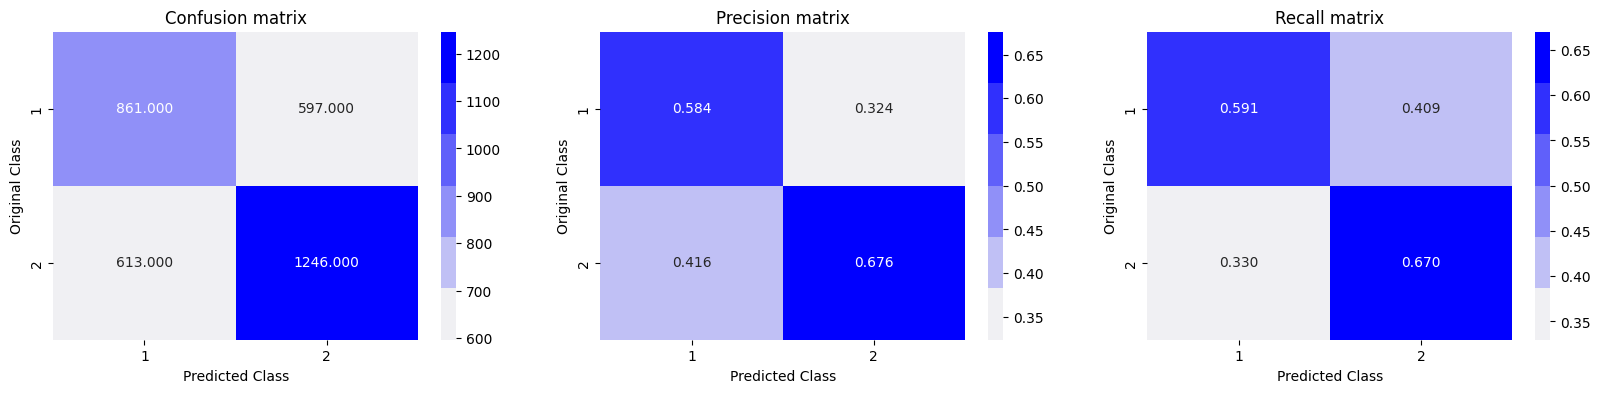

In [26]:
plot_confusion_matrix(test_Y, knn_predict)

In [27]:
# Decision Tree Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [29]:
dtree_predict=model_3.predict(test_X)

In [30]:
accuracy_score(dtree_predict,test_Y)

0.9484473922218872

In [31]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1425
           1       0.96      0.95      0.95      1892

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



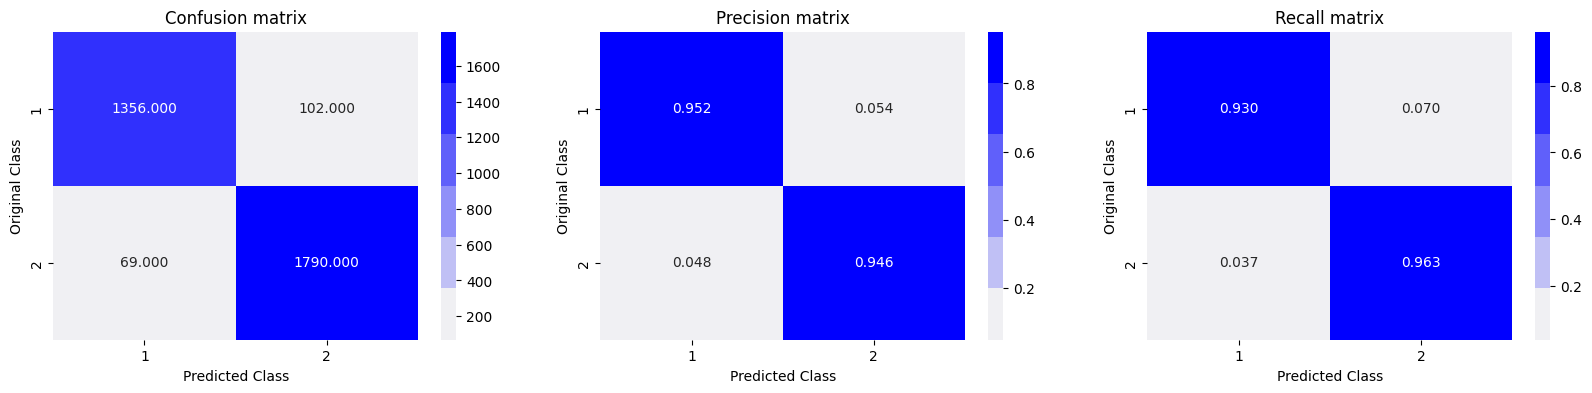

In [32]:
plot_confusion_matrix(test_Y, dtree_predict)

In [33]:
# Random Forest Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier# Random Forest Classifier Algorithm


In [34]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

<ipython-input-34-749d4f1c8dd2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4=rfc.fit(train_X,train_Y)


In [35]:
rfc_predict=model_4.predict(test_X)

In [36]:
accuracy_score(rfc_predict,test_Y)

0.9713596623454929

In [37]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      1433
           1       0.98      0.97      0.97      1884

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



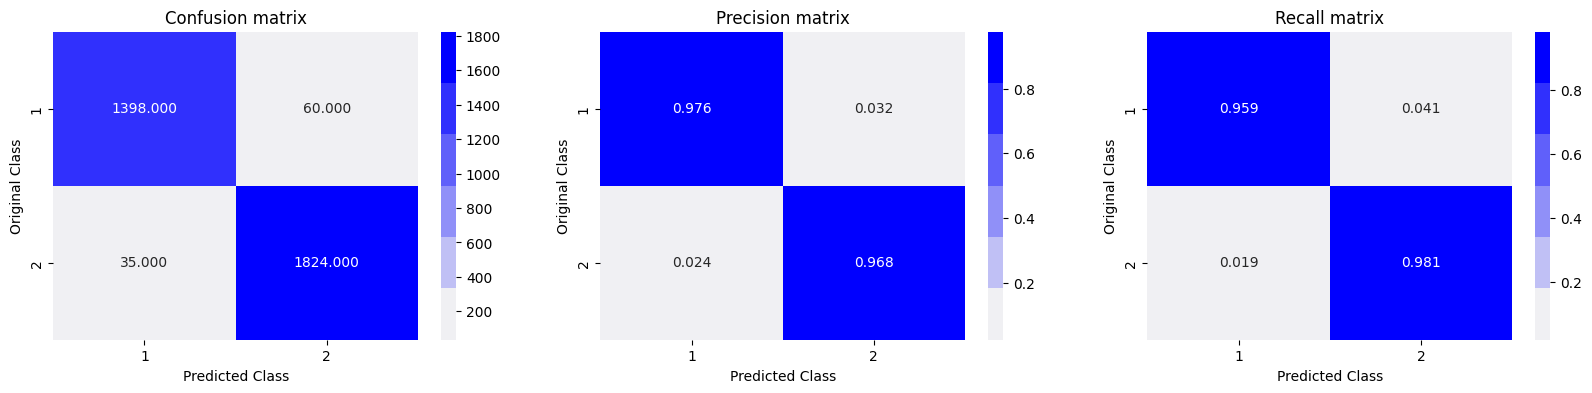

In [38]:
plot_confusion_matrix(test_Y, rfc_predict)

In [39]:
# Support Vector Machine Algorithm
from sklearn.svm import SVC

In [40]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
svm_predict=model_5.predict(test_X)

In [42]:
accuracy_score(svm_predict,test_Y)

0.5604461863129334

In [43]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.56      0.72      3317

    accuracy                           0.56      3317
   macro avg       0.50      0.28      0.36      3317
weighted avg       1.00      0.56      0.72      3317



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-19-e4af3fa5b6cb>:4: RuntimeWarning: invalid value encountered in divide
  B =(C/C.sum(axis=0))


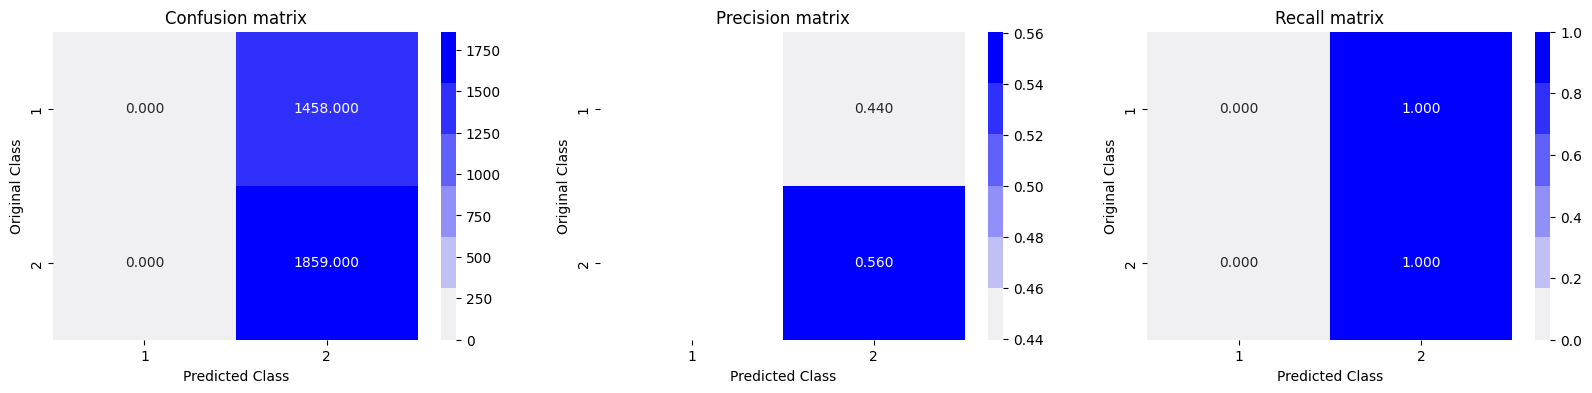

In [44]:
plot_confusion_matrix(test_Y, svm_predict)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0,max_depth=1, random_state=0)

In [46]:
clf.fit(train_X,train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=300,
                           random_state=0)

In [47]:
gb_predict=clf.predict(test_X)



In [48]:
accuracy_score(gb_predict,test_Y)

0.9342779620138679

In [49]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))


Logistic Regression Accuracy: 0.9276454627675611
K-Nearest Neighbour Accuracy: 0.6352125414531203
Decision Tree Classifier Accuracy: 0.9484473922218872
Random Forest Classifier Accuracy: 0.9713596623454929
support Vector Machine Accuracy: 0.5604461863129334
